# Homework 5 (Dev Mody)
## Exercise 3 (Model Tuning)

Let's return to the MNIST dataset of handwritten data that we worked with previously. We want to experiment with how we best tune a model to get the most optimal version. To that end let us consider the following classifier built in TensorFlow/Keras:

```python
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

alpha = 1
model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer=keras.optimizers.RMSprop(alpha), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)
```

### Exercise 3.1 

From the history plot `val_loss` versus the epochs for different training rates $\alpha = 1, 0.5, 0.1, 0.01, 0.001$. The loss is in this case defined from the categorical cross-entropy while the accuracy is the percentage of correct predictions. What happens as you decrease the value of $\alpha$? What can you say about the first value of $\alpha = 1$? Explain your results.

In [1]:
from tensorflow.keras.datasets import mnist
import autograd.numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [ ]:
alpha_list = [1., 0.5, 0.1, 0.01, 0.001]
val_loss_histories = {}
model = keras.Sequential([
        layers.Dense(512, activation='relu'),
        layers.Dense(10, activation='softmax')
])

for alpha in alpha_list:
    model.compile(optimizer=keras.optimizers.RMSprop(alpha), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)
    val_loss_histories[alpha] = history.history['val_loss']

plt.figure(figsize=(10, 6))
for lr, val_loss_history in val_loss_histories.items():
    epochs = range(1, 11)
    plt.plot(epochs, val_loss_history, label=f'Learning Rate: {lr}')
    
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 3.2 (MNIST with Logistic Regression)

Now let us look at a very small model just doing logisitic regression on the MNIST Data:

```python
model = keras.Sequential[(layers.Dense(10, activation='softmax'))]
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metircs=['accuracy'])
history_small_model = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.2)
```

Note that, if we don't specify any learning rate then the 'rmsprop' optimizer defaults to a learning rate of 0.001. You should again plot the 'val_loss' versus the epochs. Is there a clear minimum in the validation loss indicating where we start to overfit?

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7418 - loss: 1.0308 - val_accuracy: 0.8988 - val_loss: 0.3635
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9022 - loss: 0.3619 - val_accuracy: 0.9118 - val_loss: 0.3126
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9107 - loss: 0.3201 - val_accuracy: 0.9200 - val_loss: 0.2923
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9143 - loss: 0.3082 - val_accuracy: 0.9220 - val_loss: 0.2854
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9183 - loss: 0.2919 - val_accuracy: 0.9224 - val_loss: 0.2781
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9186 - loss: 0.2879 - val_accuracy: 0.9247 - val_loss: 0.2751
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9201 - loss: 0.2813 - val_accuracy: 0.9256 - val_loss: 0.2721
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9237 - loss: 0.2732 - val_accuracy: 0.

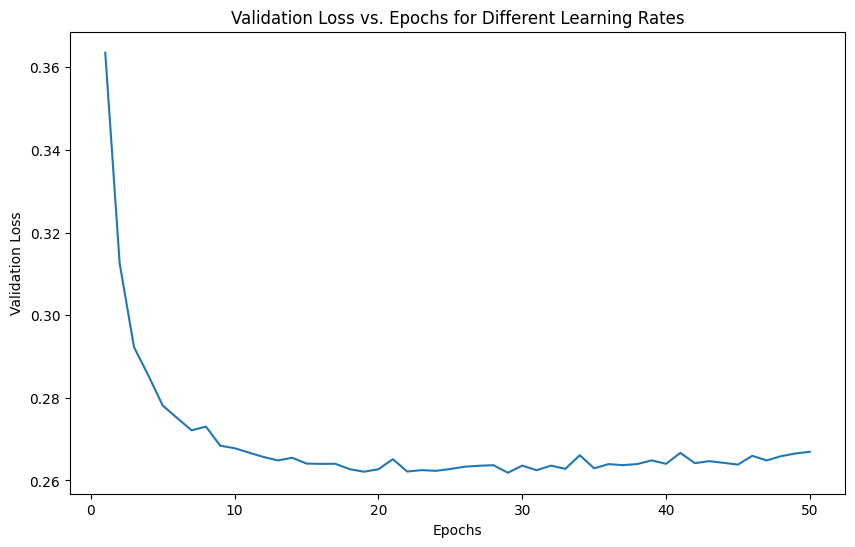

In [3]:
model = keras.Sequential([layers.Dense(10, activation='softmax')])
model.compile(optimizer='rmsprop',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=128,
    validation_split=0.2)

plt.figure(figsize=(10, 6))
epochs = range(1, 51)
plt.plot(epochs, history_small_model.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs for Different Learning Rates')
plt.show()

As we can see, the model doesn't have a clear indication of overfitting as the validation loss is still decreasing after 50 epochs, with no sudden increase forming a minimum. We can also observe that for each epoch, the training and the validation seem to go hand in hand, which is a good sign since clear overfitting would show that the training loss is significatnly lower than the validation loss.

### Exercise 3.3 (New Hidden Layers):
Now let us increase the complexity of the model by putting in hidden layers:

```python
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large_model = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.2)
```

Repeat the plot of 'val_loss' versus the epochs. Is there in this case a clear minimum with a well defined region of overfitting? Comment on your observations.

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7948 - loss: 0.7062 - val_accuracy: 0.9081 - val_loss: 0.3254
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9050 - loss: 0.3389 - val_accuracy: 0.9102 - val_loss: 0.3238
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8937 - loss: 0.3801 - val_accuracy: 0.9120 - val_loss: 0.3491
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8841 - loss: 0.4529 - val_accuracy: 0.8457 - val_loss: 0.6522
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8634 - loss: 0.6313 - val_accuracy: 0.8921 - val_loss: 0.5107
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8545 - loss: 0.7979 - val_accuracy: 0.8838 - val_loss: 0.7258
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8423 - loss: 1.0753 - val_accuracy: 0.8432 - val_loss: 1.0032
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8300 - loss: 1.4436 - val_accuracy: 0.

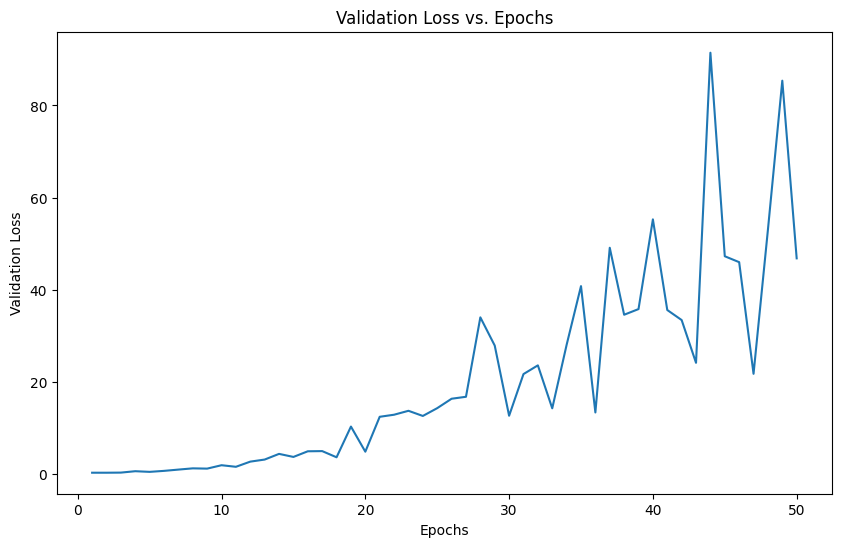

In [4]:
model = keras.Sequential([
    layers.Dense(96, activation='relu'),
    layers.Dense(96, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_large_model = model.fit(train_images, train_labels, epochs=50, batch_size=128, validation_split=0.2)

plt.figure(figsize=(10, 6))
epochs = range(1, 51)
plt.plot(epochs, history_large_model.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.title('Validation Loss vs. Epochs')
plt.show()